In [93]:
raw_data = pd.read_csv("vehicles.csv")

In [100]:
raw_data = raw_data.drop_duplicates(subset='vin')

In [1]:
vin_crawling_data = pd.read_csv("./final_vin_data.csv")
vin_crawling_data.shape

(77569, 27)

In [2]:
data = vin_crawling_data.copy()

In [3]:
test=data[data.columns.difference(['error'])]

In [4]:
df = test[['price','year','odometer','drive','fuel','manufacturer','state','title_status','transmission','type','paint_color','cylinders']]

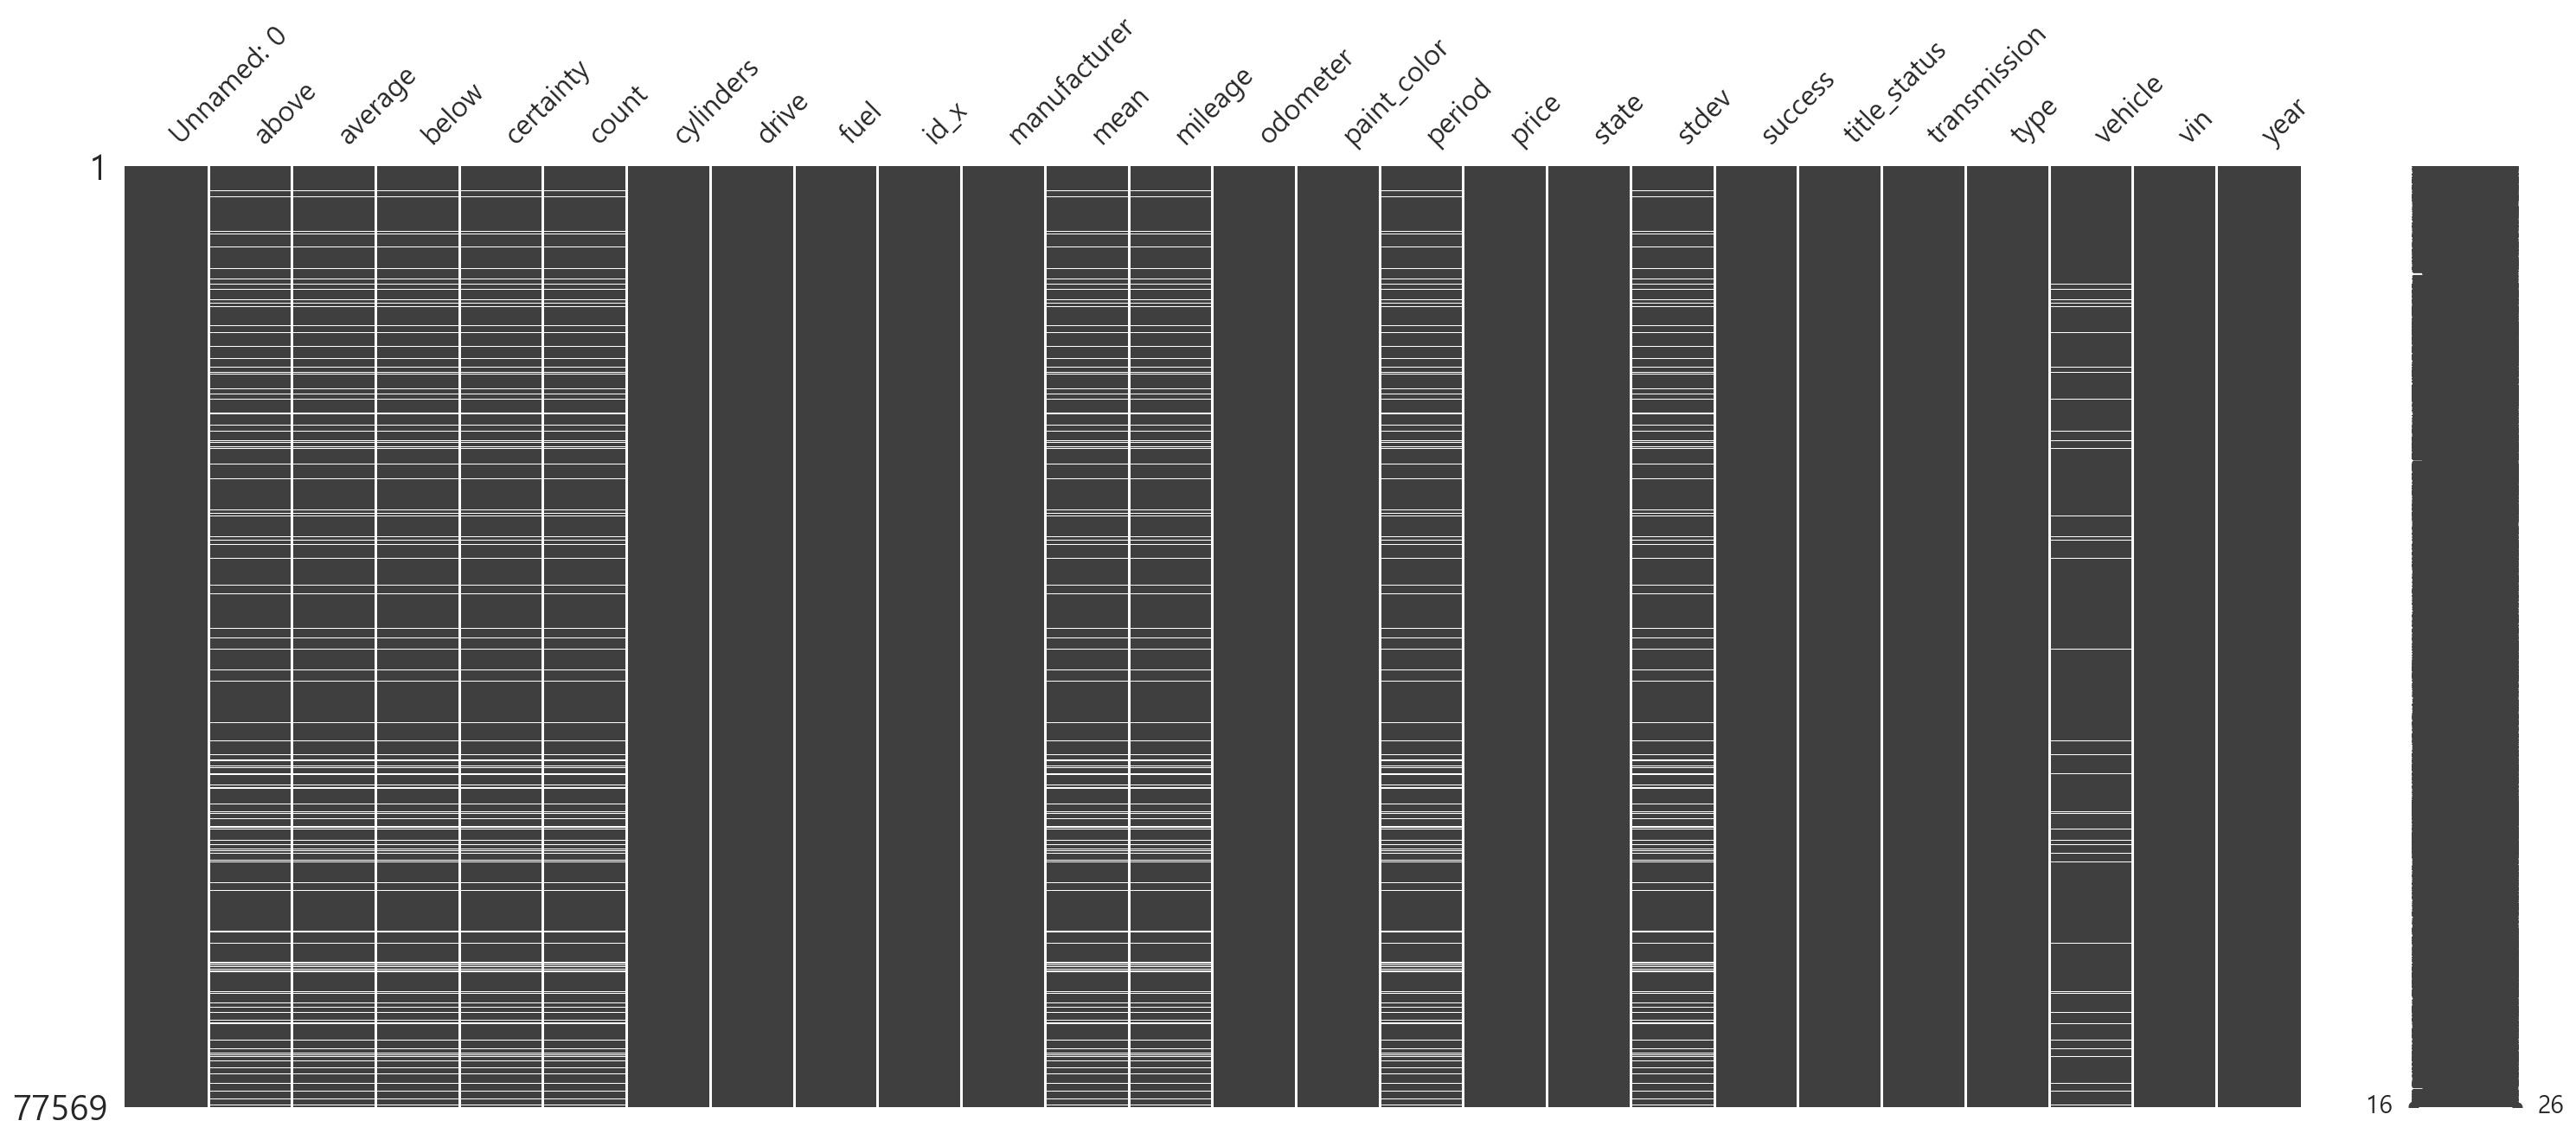

In [5]:
import missingno as msno
msno.matrix(test)
plt.show()

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77569 entries, 0 to 77568
Data columns (total 26 columns):
Unnamed: 0      77569 non-null int64
above           70268 non-null float64
average         70268 non-null float64
below           70268 non-null float64
certainty       70268 non-null float64
count           70268 non-null float64
cylinders       77569 non-null object
drive           77569 non-null object
fuel            77569 non-null object
id_x            77569 non-null int64
manufacturer    77569 non-null object
mean            70268 non-null float64
mileage         70268 non-null float64
odometer        77569 non-null float64
paint_color     77569 non-null object
period          70268 non-null object
price           77569 non-null int64
state           77569 non-null object
stdev           70268 non-null float64
success         77569 non-null bool
title_status    77569 non-null object
transmission    77569 non-null object
type            77569 non-null object
vehicle      

In [5]:
def get_data_by_sigma(num):
    global test2
    test2 = test[(test['price'] >= (test['average'] - (test['stdev']*num))) & (test['price'] <= (test['average'] + (test['stdev']*num)))]
    test2 = test2[test2['mileage'] == test2['odometer']]
    test2['year'] = test2['year'].apply(lambda x : 2019 if x < 1980 else x)
    test2= test2[test2['odometer'] != 0]
    test2= test2[test2['price'] != 0]
    test2 = test2[['price','year','odometer','drive','fuel','manufacturer','state','title_status','transmission','type','paint_color','cylinders']]
    print("{} sigma data : ".format(num),test2.shape)

In [6]:
get_data_by_sigma(2)

2 sigma data :  (55945, 12)


In [14]:
test2.columns

Index(['price', 'year', 'odometer', 'drive', 'fuel', 'manufacturer', 'state',
       'title_status', 'transmission', 'type', 'paint_color', 'cylinders'],
      dtype='object')

In [7]:
# #10개이하인 컬럼별 갯수 지우기
def drop_index(start_num, end_num, df) :
    global df_deleted_under_ten
    
    features = ['cylinders','drive','fuel','manufacturer','state','title_status','transmission','type','paint_color']
    for feature in features:
        if len(df[feature].value_counts()[(df[feature].value_counts() <end_num) & (df[feature].value_counts() > start_num)].index) > 0:
            for idx in range(len(df[feature].value_counts()[(df[feature].value_counts() <end_num) & (df[feature].value_counts() > start_num)].index)):
                df = df.drop(index = df[df[feature] == (df[feature].value_counts()[(df[feature].value_counts() <end_num) & (df[feature].value_counts() > start_num)].index)[0]].index)
                print(feature ,idx)
        else:
            print("else :"+feature)
    df_deleted_under_ten = df
    return df_deleted_under_ten

In [8]:
drop_index(0, 10 , test2)

cylinders 0
else :drive
else :fuel
manufacturer 0
manufacturer 1
manufacturer 2
manufacturer 3
manufacturer 4
manufacturer 5
manufacturer 6
else :state
title_status 0
title_status 1
else :transmission
type 0
else :paint_color


,price,year,odometer,drive,fuel,manufacturer,state,title_status,transmission,type,paint_color,cylinders
0,17899,2012.0,63500.0,4wd,gas,volkswagen,ut,clean,manual,hatchback,black,4 cylinders
1,4600,2008.0,110982.0,fwd,gas,honda,ut,clean,automatic,sedan,grey,4 cylinders
3,28895,2016.0,19086.0,4wd,gas,ram,ut,clean,automatic,truck,red,8 cylinders
10,30995,2019.0,14649.0,4wd,gas,ford,ut,clean,automatic,SUV,silver,4 cylinders
11,17500,2018.0,33565.0,fwd,gas,toyota,ut,clean,automatic,SUV,red,4 cylinders
...,...,...,...,...,...,...,...,...,...,...,...,...
77563,31995,2015.0,66425.0,4wd,gas,chevrolet,ut,clean,automatic,pickup,white,8 cylinders
77564,33895,2016.0,49698.0,4wd,gas,ford,ut,clean,automatic,truck,blue,6 cylinders
77566,7500,2014.0,99990.0,fwd,gas,nissan,ut,clean,manual,hatchback,white,4 cylinders
77567,32000,2018.0,39457.0,4wd,gas,gmc,ut,clean,automatic,pickup,black,6 cylinders


In [54]:
def check_under_10_index(start_num,end_num,columns,df):
    test = {}
    test2 = []
    for column in columns:
        len_under_10 = len(df[column].value_counts()[(df[column].value_counts() < end_num) & (df[column].value_counts() > start_num)])
        if len_under_10:
            for i in range(len_under_10):
                index = df[df[column] == df[column].value_counts()[(df[column].value_counts() < end_num) & (df[column].value_counts() > start_num)].index[i]].index.values
                value = df[column].value_counts()[(df[column].value_counts() < end_num) & (df[column].value_counts() > start_num)].index[i]  
                test[value] = index
    test2.append(test)
    return test2

In [55]:
index_dict = check_under_10_index(2,10, df[['cylinders','manufacturer','title_status','type']],test2)
index_df = pd.DataFrame(index_dict)
index_df

,tesla,alfa-romeo,harley-davidson,missing,parts only,bus
0,"[1453, 2631, 17239, 17253, 18399, 18401, 20447...","[2675, 15361, 18657, 24632, 40706, 68794, 71592]","[9068, 47025, 72506, 72537]","[14615, 21883, 27815, 46532]","[12191, 13089, 41128]","[1910, 13654, 23147, 37821]"


### 컬럼별 10개이하인 것들을 3등분하기

In [11]:
for_test_data = []
for_train_data_train = []
for_train_data_test = []
for column in ['tesla','alfa-romeo','harley-davidson','missing','bus','parts only']:
    start = list(index_df[column][0])
    random.shuffle(start)
    if len(start) > 4:
        m = [start[i:i + 3] for i in range(0, len(start), 3)]
        for_test_data.append(m[0])
        for_train_data_train.append(m[1])
        for_train_data_test.append(m[2])
    elif len(start) == 4:
        m = [start[:2], start[2:3], start[3:]]
        for_test_data.append(m[0])
        for_train_data_train.append(m[1])
        for_train_data_test.append(m[2])
    else :
        m = [[i] for i in start]
        for_test_data.append(m[0])
        for_train_data_train.append(m[1])
        for_train_data_test.append(m[2])

###  train, test 나누기

In [36]:
train_data, test_data = train_test_split(df_deleted_under_ten, test_size = .20, random_state = 7)
train_data = pd.concat([train_data, df.iloc[
    [element for array in for_train_data_train for element in array] + [element for array in for_train_data_test for element in array]
]],axis=0)
test_data = pd.concat([test_data,df.iloc[
    [element for array in for_test_data for element in array]]])
train_data.shape, test_data.shape

((44742, 12), (11195, 12))

### 과최적화를 막기위해서 adjust r2score 로 측정

#### 기본

In [74]:
result = []

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.metrics import r2_score
kf = KFold(5, shuffle=True, random_state=9)
model_1_cross_val_score = []
for X_train_index, X_test_index in kf.split(train_data):
    
    X_train= train_data.iloc[X_train_index]
    X_test = train_data.iloc[X_test_index]
    
    X_train = pd.concat([X_train, train_data[train_data.index.isin([element for array in for_train_data_train for element in array])]], axis=0)
    X_test = pd.concat([X_test, train_data[train_data.index.isin([element for array in for_train_data_test for element in array])]], axis=0)
    model1 = sm.OLS.from_formula("np.log(price) ~ scale(odometer) + scale(year) +C(manufacturer)+C(cylinders)+C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)+0",X_train)
    result = model1.fit()
    pred = result.predict(X_test)
    R2 = r2_score(np.log(X_test.price),pred)
    n = train_data.shape[0]
    p = len(pd.get_dummies(train_data).columns)
    Adjr2 = 1-(1-R2)*(n-1)/(n-p-1)
    model_1_cross_val_score.append(Adjr2)
 

In [77]:
model_1_cross_val_score

[0.8567070145088654,
 0.8549601671644032,
 0.8517455718312255,
 0.8528635048471045,
 0.8574255239179401]

### manufacturer: cylinders

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.metrics import r2_score
kf = KFold(5, shuffle=True, random_state=9)
model_2_cross_val_score = []
for X_train_index, X_test_index in kf.split(train_data):
    
    X_train= train_data.iloc[X_train_index]
    X_test = train_data.iloc[X_test_index]
    
    X_train = pd.concat([X_train, train_data[train_data.index.isin([element for array in for_train_data_train for element in array])]], axis=0)
    X_test = pd.concat([X_test, train_data[train_data.index.isin([element for array in for_train_data_test for element in array])]], axis=0)
    model1 = sm.OLS.from_formula("np.log(price) ~ scale(odometer) + scale(year) +C(manufacturer):C(cylinders)+C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)+0",X_train)
    result = model1.fit()
    pred = result.predict(X_test)
    R2 = r2_score(np.log(X_test.price),pred)
    n = train_data.shape[0]
    p = len(pd.get_dummies(train_data).columns)
    Adjr2 = 1-(1-R2)*(n-1)/(n-p-1)
    model_2_cross_val_score.append(Adjr2)
model_2_cross_val_score

[0.8664796238960164,
 0.8641051975983179,
 0.8607747940891662,
 0.8638103447597985,
 0.8677273296721579]

### manufacturer: fuel

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.metrics import r2_score
kf = KFold(5, shuffle=True, random_state=9)
model_3_cross_val_score = []
for X_train_index, X_test_index in kf.split(train_data):
    
    X_train= train_data.iloc[X_train_index]
    X_test = train_data.iloc[X_test_index]
    
    X_train = pd.concat([X_train, train_data[train_data.index.isin([element for array in for_train_data_train for element in array])]], axis=0)
    X_test = pd.concat([X_test, train_data[train_data.index.isin([element for array in for_train_data_test for element in array])]], axis=0)
    model1 = sm.OLS.from_formula("np.log(price) ~ scale(odometer) + scale(year) +C(manufacturer):C(fuel)+C(cylinders)+C(drive)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)+0",X_train)
    result = model1.fit()
    pred = result.predict(X_test)
    R2 = r2_score(np.log(X_test.price),pred)
    n = train_data.shape[0]
    p = len(pd.get_dummies(train_data).columns)
    Adjr2 = 1-(1-R2)*(n-1)/(n-p-1)
    model_3_cross_val_score.append(Adjr2)
model_3_cross_val_score

[0.8599169925377217,
 0.8566187852651308,
 0.8554182558631551,
 0.857988435026111,
 0.861010591831513]

### cylinders:fuel

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.metrics import r2_score
kf = KFold(5, shuffle=True, random_state=9)
model_4_cross_val_score = []
for X_train_index, X_test_index in kf.split(train_data):
    
    X_train= train_data.iloc[X_train_index]
    X_test = train_data.iloc[X_test_index]
    
    X_train = pd.concat([X_train, train_data[train_data.index.isin([element for array in for_train_data_train for element in array])]], axis=0)
    X_test = pd.concat([X_test, train_data[train_data.index.isin([element for array in for_train_data_test for element in array])]], axis=0)
    model1 = sm.OLS.from_formula("np.log(price) ~ scale(odometer) + scale(year) +C(manufacturer)+C(fuel):C(cylinders)+C(drive)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)+0",X_train)
    result = model1.fit()
    pred = result.predict(X_test)
    R2 = r2_score(np.log(X_test.price),pred)
    n = train_data.shape[0]
    p = len(pd.get_dummies(train_data).columns)
    Adjr2 = 1-(1-R2)*(n-1)/(n-p-1)
    model_4_cross_val_score.append(Adjr2)
model_4_cross_val_score

[0.8589913055656144,
 0.8571083961587856,
 0.8533852490509721,
 0.8559894150691756,
 0.8603445906390934]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.metrics import r2_score
kf = KFold(5, shuffle=True, random_state=9)
model_4_cross_val_score = []
for X_train_index, X_test_index in kf.split(train_data):
    
    X_train= train_data.iloc[X_train_index]
    X_test = train_data.iloc[X_test_index]
    
    X_train = pd.concat([X_train, train_data[train_data.index.isin([element for array in for_train_data_train for element in array])]], axis=0)
    X_test = pd.concat([X_test, train_data[train_data.index.isin([element for array in for_train_data_test for element in array])]], axis=0)
    model1 = sm.OLS.from_formula("np.log(price) ~ scale(odometer) + scale(year) +C(manufacturer)+C(fuel):C(cylinders)+C(drive)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)+0",X_train)
    result = model1.fit()
    pred = result.predict(X_test)
    R2 = r2_score(np.log(X_test.price),pred)
    n = train_data.shape[0]
    p = len(pd.get_dummies(train_data).columns)
    Adjr2 = 1-(1-R2)*(n-1)/(n-p-1)
    model_4_cross_val_score.append(Adjr2)
model_4_cross_val_score

In [84]:
result = [model_1_cross_val_score, model_2_cross_val_score, model_3_cross_val_score, model_4_cross_val_score]

###  C(manufacturer):C(drive)

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.metrics import r2_score
kf = KFold(5, shuffle=True, random_state=9)
model_5_cross_val_score = []
for X_train_index, X_test_index in kf.split(train_data):
    
    X_train= train_data.iloc[X_train_index]
    X_test = train_data.iloc[X_test_index]
    
    X_train = pd.concat([X_train, train_data[train_data.index.isin([element for array in for_train_data_train for element in array])]], axis=0)
    X_test = pd.concat([X_test, train_data[train_data.index.isin([element for array in for_train_data_test for element in array])]], axis=0)
    model1 = sm.OLS.from_formula("np.log(price) ~ scale(odometer) + scale(year) +C(manufacturer):C(drive)+C(fuel)+C(cylinders)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)+0",X_train)
    result = model1.fit()
    pred = result.predict(X_test)
    R2 = r2_score(np.log(X_test.price),pred)
    n = train_data.shape[0]
    p = len(pd.get_dummies(train_data).columns)
    Adjr2 = 1-(1-R2)*(n-1)/(n-p-1)
    model_5_cross_val_score.append(Adjr2)
model_5_cross_val_score

[0.8602415818365367,
 0.8576429431638583,
 0.854858343078897,
 0.857155569158958,
 0.8617157063143096]

###  scale(year):C(cylinders)

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.metrics import r2_score
kf = KFold(5, shuffle=True, random_state=9)
model_6_cross_val_score = []
for X_train_index, X_test_index in kf.split(train_data):
    
    X_train= train_data.iloc[X_train_index]
    X_test = train_data.iloc[X_test_index]
    
    X_train = pd.concat([X_train, train_data[train_data.index.isin([element for array in for_train_data_train for element in array])]], axis=0)
    X_test = pd.concat([X_test, train_data[train_data.index.isin([element for array in for_train_data_test for element in array])]], axis=0)
    model1 = sm.OLS.from_formula("np.log(price) ~ scale(odometer) +scale(year)+ scale(year):C(cylinders) +C(manufacturer):C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)+0",X_train)
    result = model1.fit()
    pred = result.predict(X_test)
    R2 = r2_score(np.log(X_test.price),pred)
    n = train_data.shape[0]
    p = len(pd.get_dummies(train_data).columns)
    Adjr2 = 1-(1-R2)*(n-1)/(n-p-1)
    model_6_cross_val_score.append(Adjr2)
model_6_cross_val_score

[0.8401511667826893,
 0.8390662418745425,
 0.8366395287748091,
 0.8368053754139528,
 0.8432378127809821]

### model 2

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.metrics import r2_score
kf = KFold(5, shuffle=True, random_state=9)
model_7_cross_val_score = []
for X_train_index, X_test_index in kf.split(train_data):
    
    X_train= train_data.iloc[X_train_index]
    X_test = train_data.iloc[X_test_index]
    
    X_train = pd.concat([X_train, train_data[train_data.index.isin([element for array in for_train_data_train for element in array])]], axis=0)
    X_test = pd.concat([X_test, train_data[train_data.index.isin([element for array in for_train_data_test for element in array])]], axis=0)
    model1 = sm.OLS.from_formula("np.log(price) ~ scale(odometer) + scale(year) + cylinders + drive + fuel + manufacturer + paint_color + state + title_status + transmission + type + scale(year):C(cylinders) + scale(odometer): C(fuel) + scale(year):C(fuel) + scale(odometer): C(drive) + scale(year):C(drive)",X_train)
    result = model1.fit()
    pred = result.predict(X_test)
    R2 = r2_score(np.log(X_test.price),pred)
    n = train_data.shape[0]
    p = len(pd.get_dummies(train_data).columns)
    Adjr2 = 1-(1-R2)*(n-1)/(n-p-1)
    model_7_cross_val_score.append(Adjr2)
model_7_cross_val_score

[0.867026348083465,
 0.8652071871334521,
 0.8637902638237684,
 0.862588992843494,
 0.8680934128172204]

In [105]:
result = [model_1_cross_val_score, model_2_cross_val_score, model_3_cross_val_score, model_4_cross_val_score, model_5_cross_val_score, model_6_cross_val_score, model_7_cross_val_score]

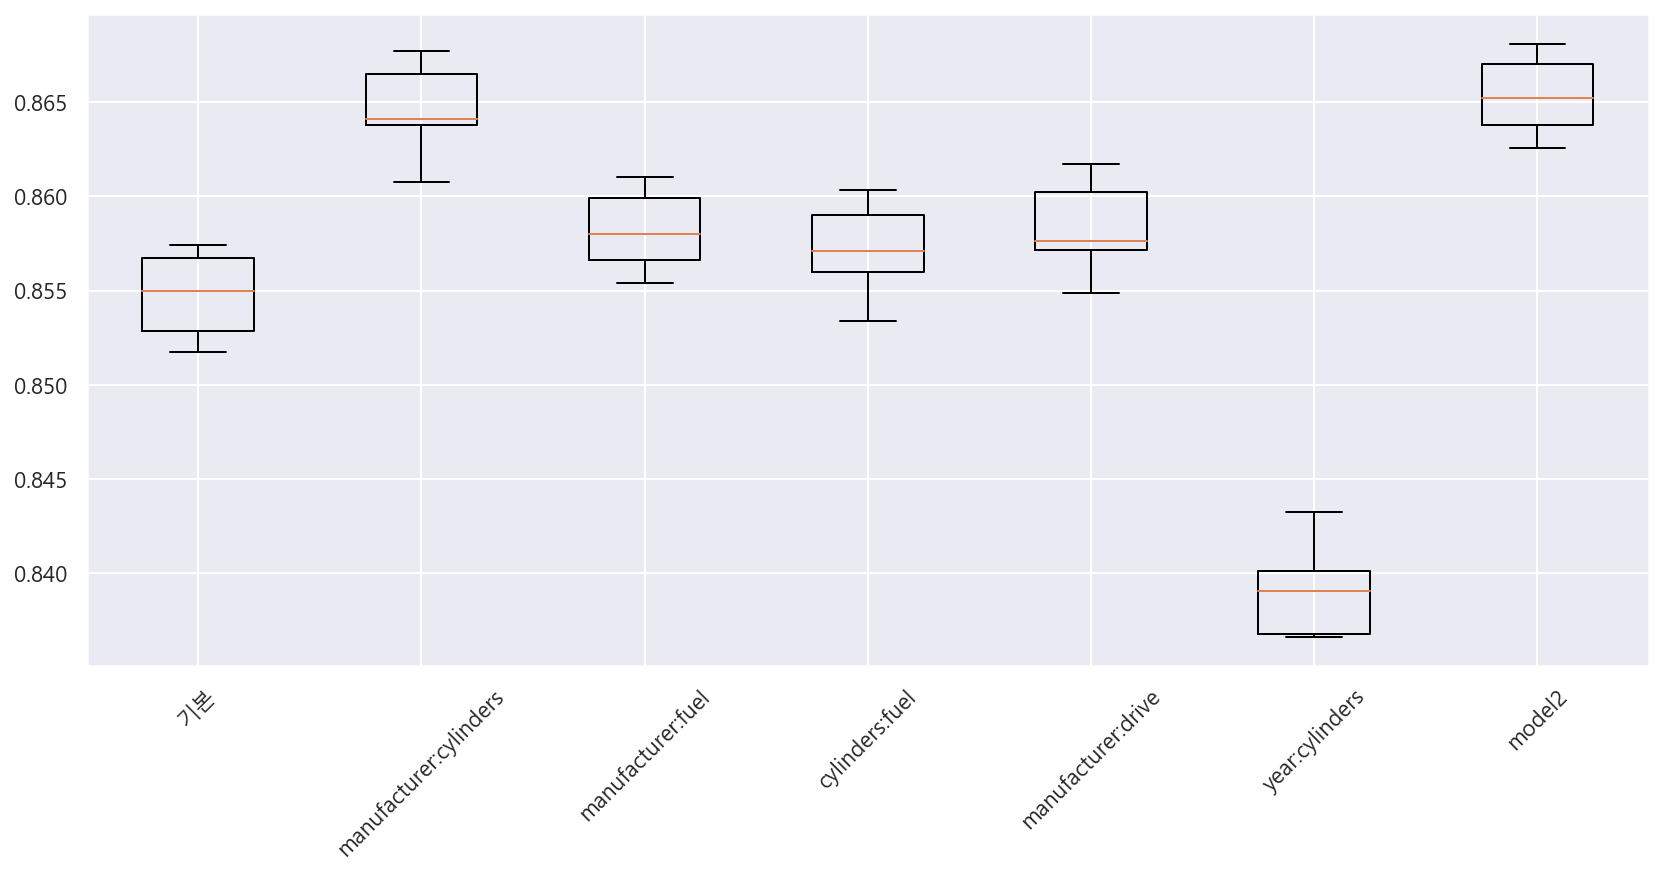

In [106]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax1.boxplot(result)
ax1.set_xticklabels(["기본", "manufacturer:cylinders", "manufacturer:fuel", "cylinders:fuel", "manufacturer:drive", "year:cylinders", "model2"], rotation=45)
plt.show()

### 1way-interaction

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.metrics import r2_score
X = ['fuel','title_status','transmission','drive','type','paint_color',"cylinders", "manufacturer"]
combination_score = []
combination_name = []
for count in range(len(X)):
    feature = X[-1]
    X.pop()
   
    for i in X:
        interaction = feature+":"+i
        
        kf = KFold(5, shuffle=True, random_state=9)
        model_cross_val_score = []
        for X_train_index, X_test_index in kf.split(train_data):
    
            X_train= train_data.iloc[X_train_index]
            X_test = train_data.iloc[X_test_index]

            X_train = pd.concat([X_train, train_data[train_data.index.isin([element for array in for_train_data_train for element in array])]], axis=0)
            X_test = pd.concat([X_test, train_data[train_data.index.isin([element for array in for_train_data_test for element in array])]], axis=0)
            model1 = sm.OLS.from_formula("np.log(price) ~ scale(odometer) + scale(year) +{}+{}".format("+".join(X_train.columns.difference(["price",'odometer','year',feature, i ])), interaction),X_train)
            result = model1.fit()
            pred = result.predict(X_test)
            R2 = r2_score(np.log(X_test.price),pred)
            n = train_data.shape[0]
            p = len(pd.get_dummies(train_data).columns)
            Adjr2 = 1-(1-R2)*(n-1)/(n-p-1)
            model_cross_val_score.append(Adjr2)
        combination_score.append(model_cross_val_score)
        combination_name.append(interaction)


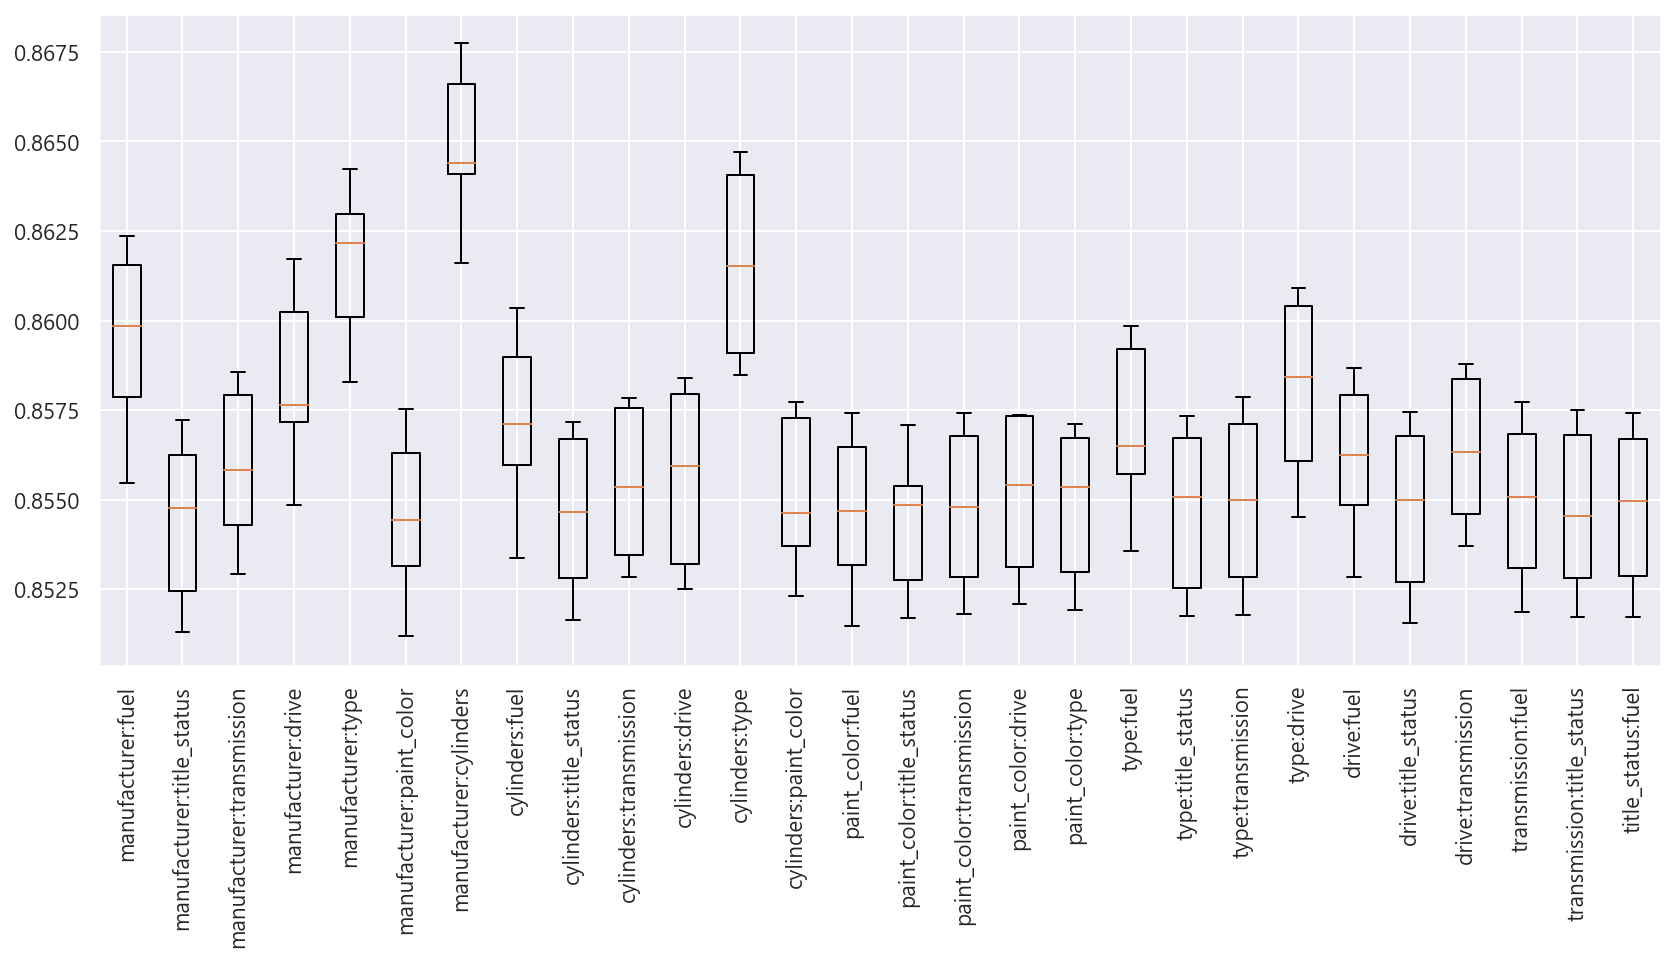

In [121]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax1.boxplot(combination_score)
ax1.set_xticklabels(combination_name, rotation=90)
plt.show()

In [74]:
combination_name.append("기본")

In [75]:
combination_score.append([0.8567070145088654, 0.8549601671644032, 0.8517455718312255, 0.8528635048471045, 0.8574255239179401])

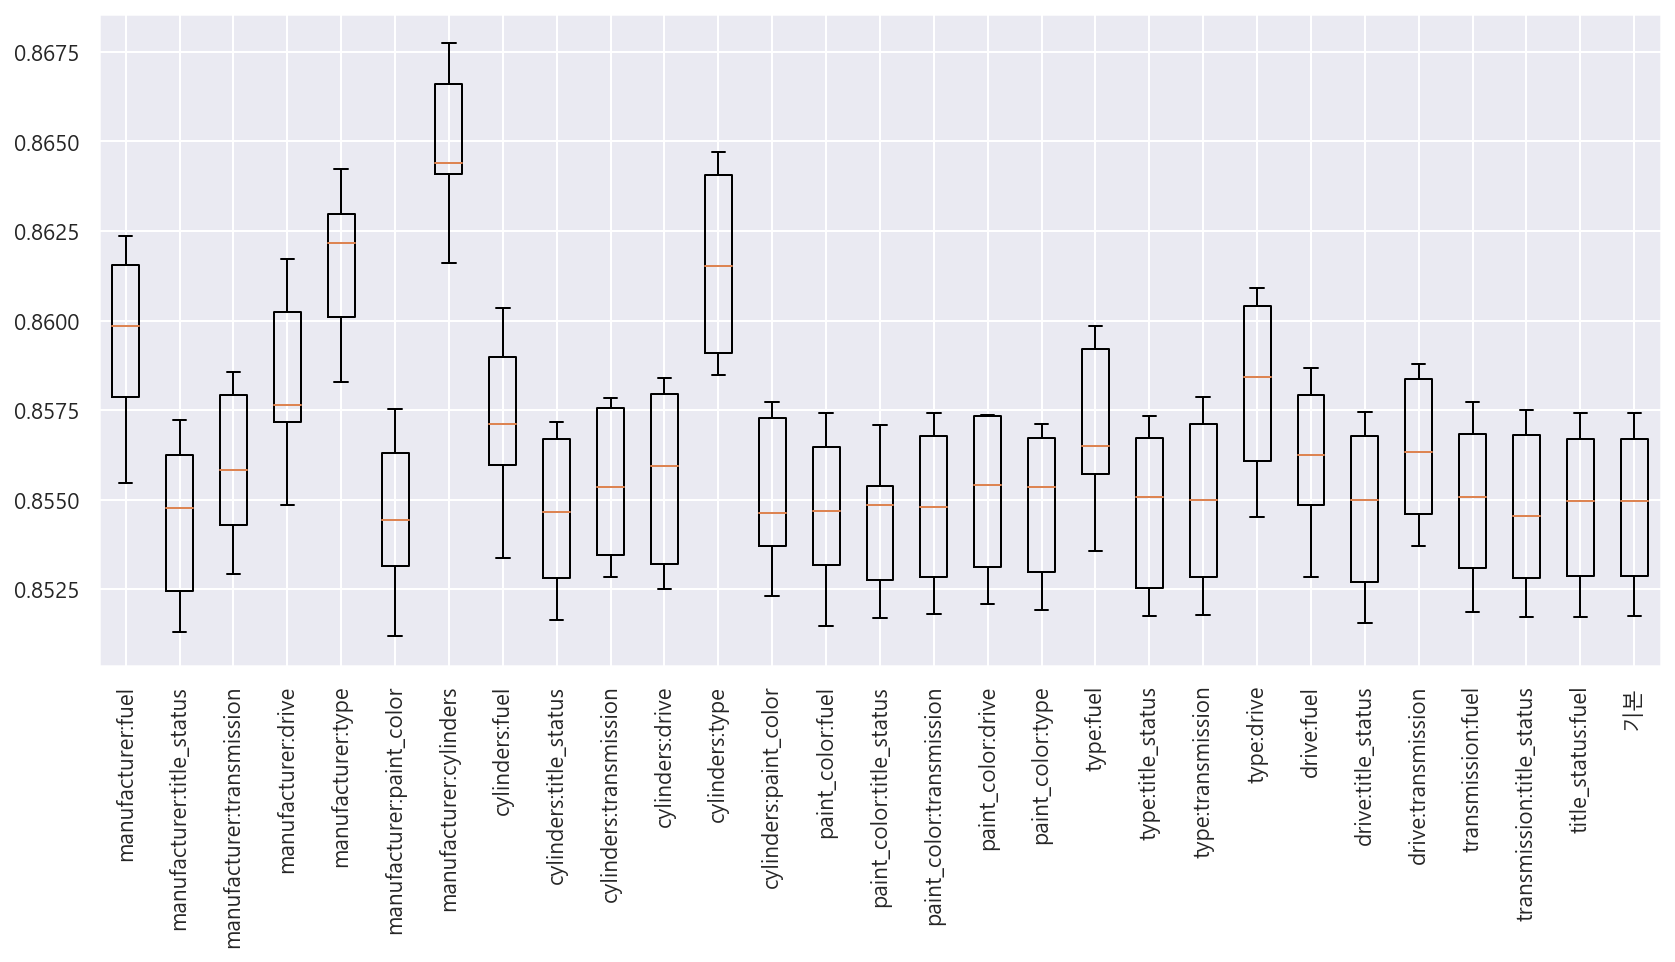

In [124]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax1.boxplot(combination_score)
ax1.set_xticklabels(combination_name, rotation=90)
plt.show()

### 2way-interaction 2개

In [125]:
interaction_2_score = [[0.8567070145088654, 0.8549601671644032, 0.8517455718312255, 0.8528635048471045, 0.8574255239179401],[0.8664796238960164, 0.8641051975983179, 0.8607747940891662, 0.8638103447597985, 0.8677273296721579] ]
intetaction_2_name = ["기본", "manufacturer:cylinders", "manufacturer:cylinders, type:drive"]

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.metrics import r2_score
kf = KFold(5, shuffle=True, random_state=9)
model_1_cross_val_score = []
for X_train_index, X_test_index in kf.split(train_data):
    
    X_train= train_data.iloc[X_train_index]
    X_test = train_data.iloc[X_test_index]
    
    X_train = pd.concat([X_train, train_data[train_data.index.isin([element for array in for_train_data_train for element in array])]], axis=0)
    X_test = pd.concat([X_test, train_data[train_data.index.isin([element for array in for_train_data_test for element in array])]], axis=0)
    model1 = sm.OLS.from_formula("np.log(price) ~ scale(odometer) + scale(year) + cylinders:manufacturer + fuel+ paint_color + state + title_status + transmission+type:drive",X_train)
    result = model1.fit()
    pred = result.predict(X_test)
    R2 = r2_score(np.log(X_test.price),pred)
    n = train_data.shape[0]
    p = len(pd.get_dummies(train_data).columns)
    Adjr2 = 1-(1-R2)*(n-1)/(n-p-1)
    model_1_cross_val_score.append(Adjr2)
interaction_2_score.append(model_1_cross_val_score)


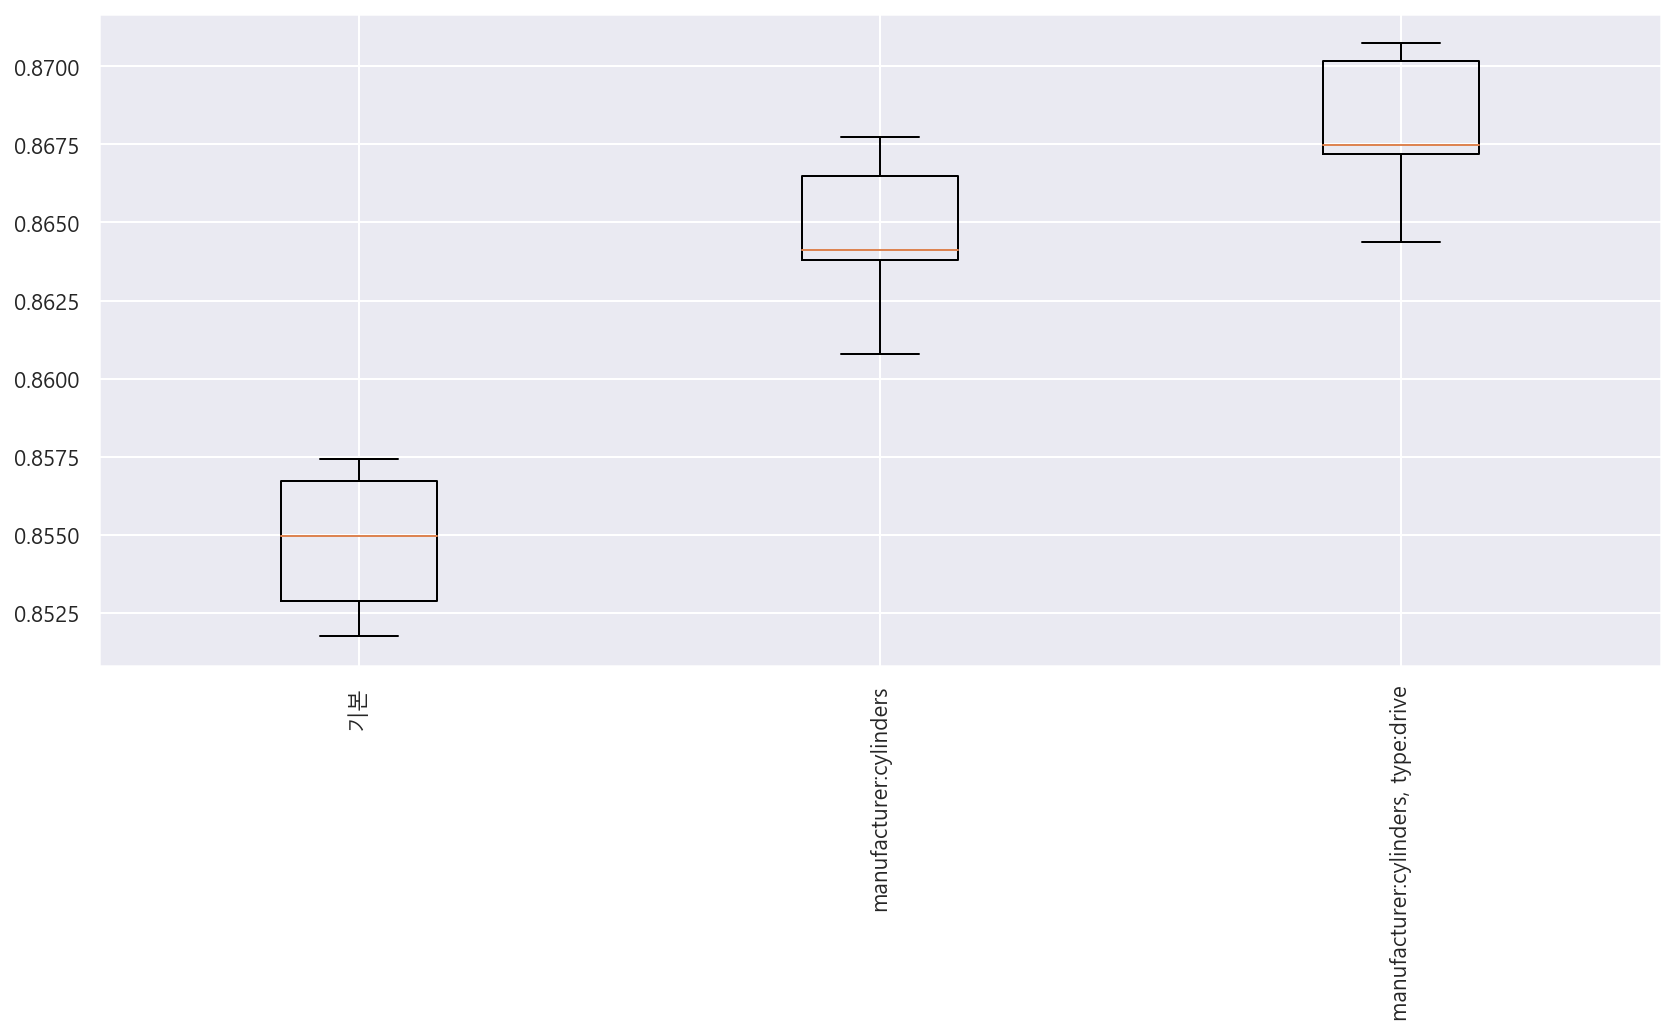

In [127]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax1.boxplot(interaction_2_score)
ax1.set_xticklabels(intetaction_2_name, rotation=90)
plt.show()

### 3way-interaction 

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.metrics import r2_score
kf = KFold(5, shuffle=True, random_state=9)
model_2_cross_val_score = []
for X_train_index, X_test_index in kf.split(train_data):
    
    X_train= train_data.iloc[X_train_index]
    X_test = train_data.iloc[X_test_index]
    
    X_train = pd.concat([X_train, train_data[train_data.index.isin([element for array in for_train_data_train for element in array])]], axis=0)
    X_test = pd.concat([X_test, train_data[train_data.index.isin([element for array in for_train_data_test for element in array])]], axis=0)
    model1 = sm.OLS.from_formula("np.log(price) ~ scale(odometer) + scale(year) +C(manufacturer):C(cylinders):C(type)+C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(paint_color)+0",X_train)
    result = model1.fit()
    pred = result.predict(X_test)
    R2 = r2_score(np.log(X_test.price),pred)
    n = train_data.shape[0]
    p = len(pd.get_dummies(train_data).columns)
    Adjr2 = 1-(1-R2)*(n-1)/(n-p-1)
    model_2_cross_val_score.append(Adjr2)
interaction_2_score.append(model_2_cross_val_score)

In [130]:
intetaction_2_name = ["기본", "manufacturer:cylinders", "manufacturer:cylinders, type:drive", "manufacturer:cylinders:type"]

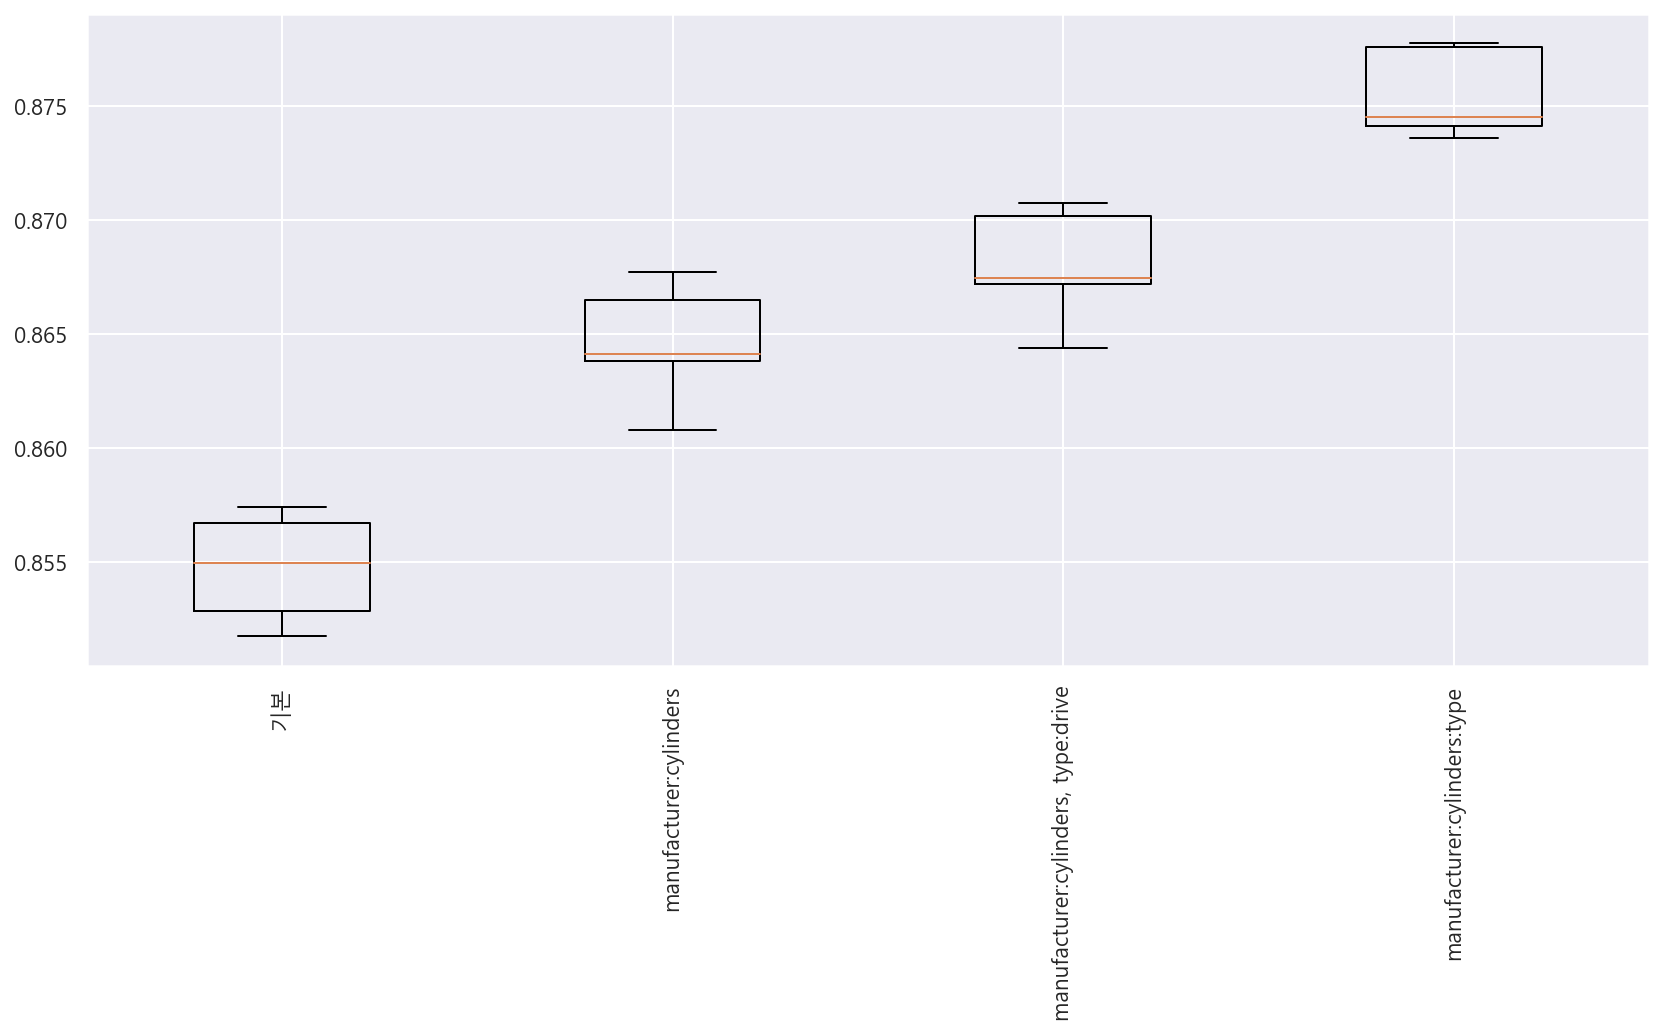

In [131]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax1.boxplot(interaction_2_score)
ax1.set_xticklabels(intetaction_2_name, rotation=90)
plt.show()

### 실수형 * 범주형 interaction

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.metrics import r2_score
Numbers = ['scale(odometer)', 'scale(year)']
X = ['fuel','title_status','transmission','drive','type','paint_color',"cylinders", "manufacturer"]
combination_score = []
combination_name = []
for number in Numbers:
    feature = number
       
    for i in X:
        interaction = feature+":"+i
        
        kf = KFold(5, shuffle=True, random_state=9)
        model_cross_val_score = []
        for X_train_index, X_test_index in kf.split(train_data):
    
            X_train= train_data.iloc[X_train_index]
            X_test = train_data.iloc[X_test_index]

            X_train = pd.concat([X_train, train_data[train_data.index.isin([element for array in for_train_data_train for element in array])]], axis=0)
            X_test = pd.concat([X_test, train_data[train_data.index.isin([element for array in for_train_data_test for element in array])]], axis=0)
            model1 = sm.OLS.from_formula("np.log(price) ~ scale(odometer) + scale(year) +{}+{}".format("+".join(X_train.columns.difference(["price",'odometer','year'])), interaction),X_train)
            result = model1.fit()
            pred = result.predict(X_test)
            R2 = r2_score(np.log(X_test.price),pred)
            n = train_data.shape[0]
            p = len(pd.get_dummies(train_data).columns)
            Adjr2 = 1-(1-R2)*(n-1)/(n-p-1)
            model_cross_val_score.append(Adjr2)
        combination_score.append(model_cross_val_score)
        combination_name.append(interaction)

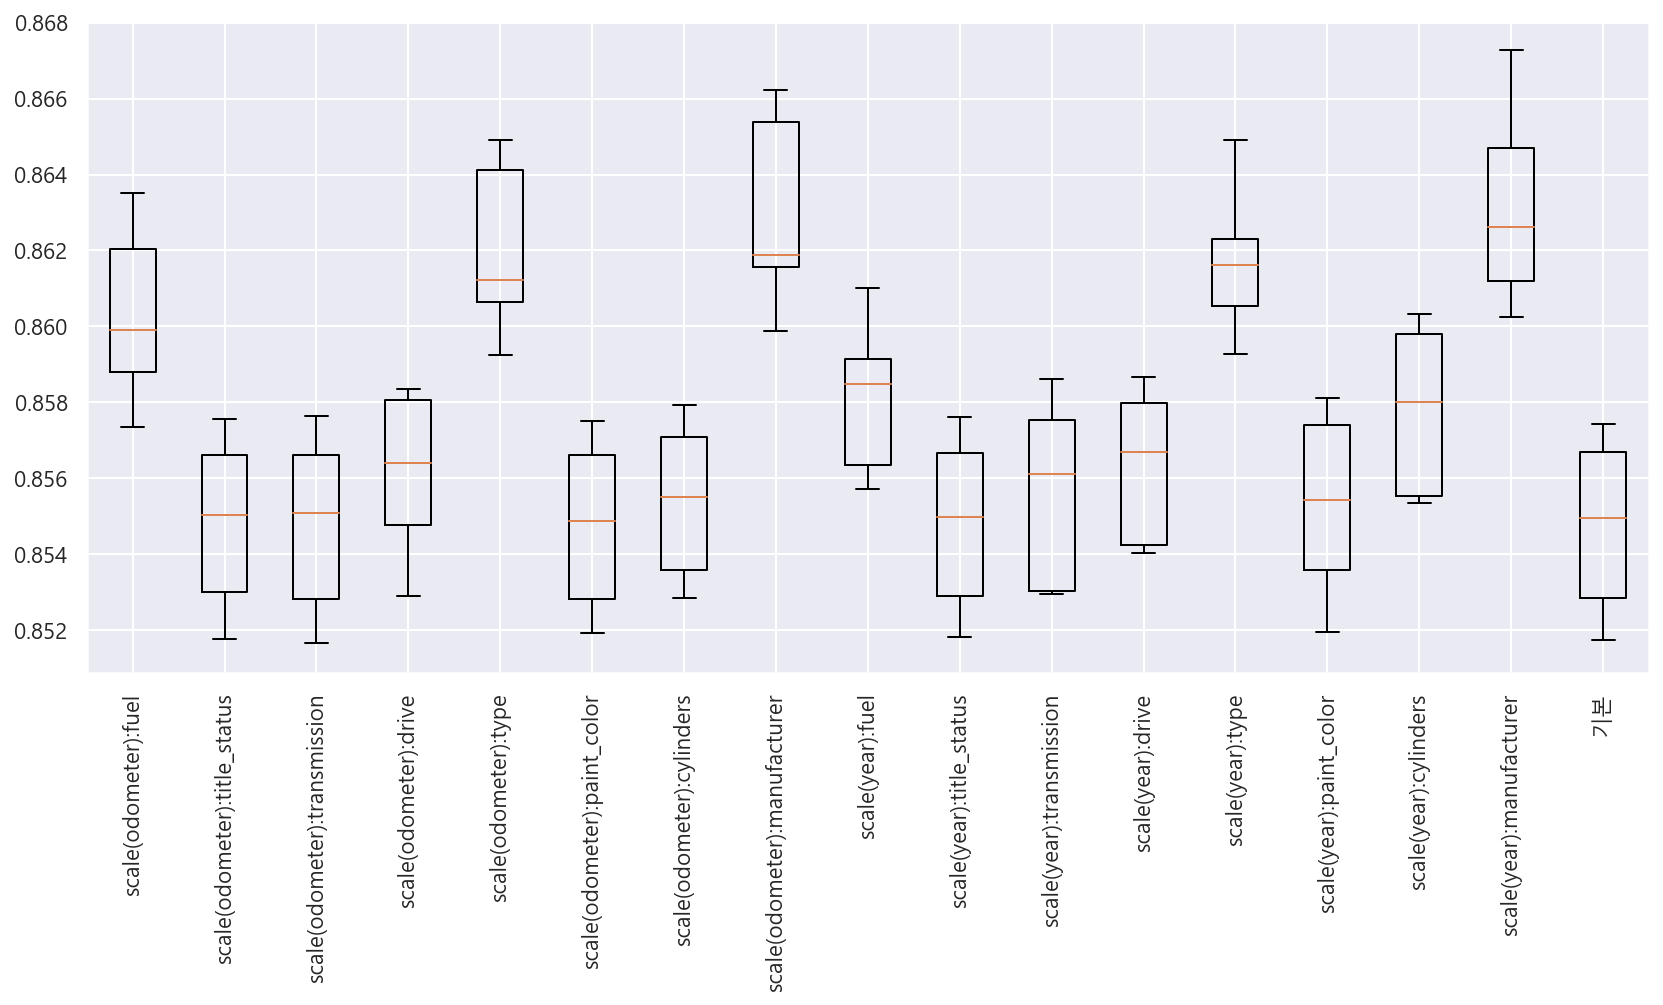

In [71]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax1.boxplot(combination_score)
ax1.set_xticklabels(combination_name, rotation=90)
plt.show()

### 범주형 * 범주형 interaction

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.metrics import r2_score
X = ['fuel','title_status','transmission','drive','type','paint_color',"cylinders", "manufacturer"]
combination_score = []
combination_name = []
for count in range(len(X)):
    feature = X[-1]
    X.pop()
   
    for i in X:
        interaction = feature+"*"+i
        
        kf = KFold(5, shuffle=True, random_state=9)
        model_cross_val_score = []
        for X_train_index, X_test_index in kf.split(train_data):
    
            X_train= train_data.iloc[X_train_index]
            X_test = train_data.iloc[X_test_index]

            X_train = pd.concat([X_train, train_data[train_data.index.isin([element for array in for_train_data_train for element in array])]], axis=0)
            X_test = pd.concat([X_test, train_data[train_data.index.isin([element for array in for_train_data_test for element in array])]], axis=0)
            model1 = sm.OLS.from_formula("np.log(price) ~ scale(odometer) + scale(year) +{}+{}".format("+".join(X_train.columns.difference(["price",'odometer','year',feature, i ])), interaction),X_train)
            result = model1.fit()
            pred = result.predict(X_test)
            R2 = r2_score(np.log(X_test.price),pred)
            n = train_data.shape[0]
            p = len(pd.get_dummies(train_data).columns)
            Adjr2 = 1-(1-R2)*(n-1)/(n-p-1)
            model_cross_val_score.append(Adjr2)
        combination_score.append(model_cross_val_score)
        combination_name.append(interaction)


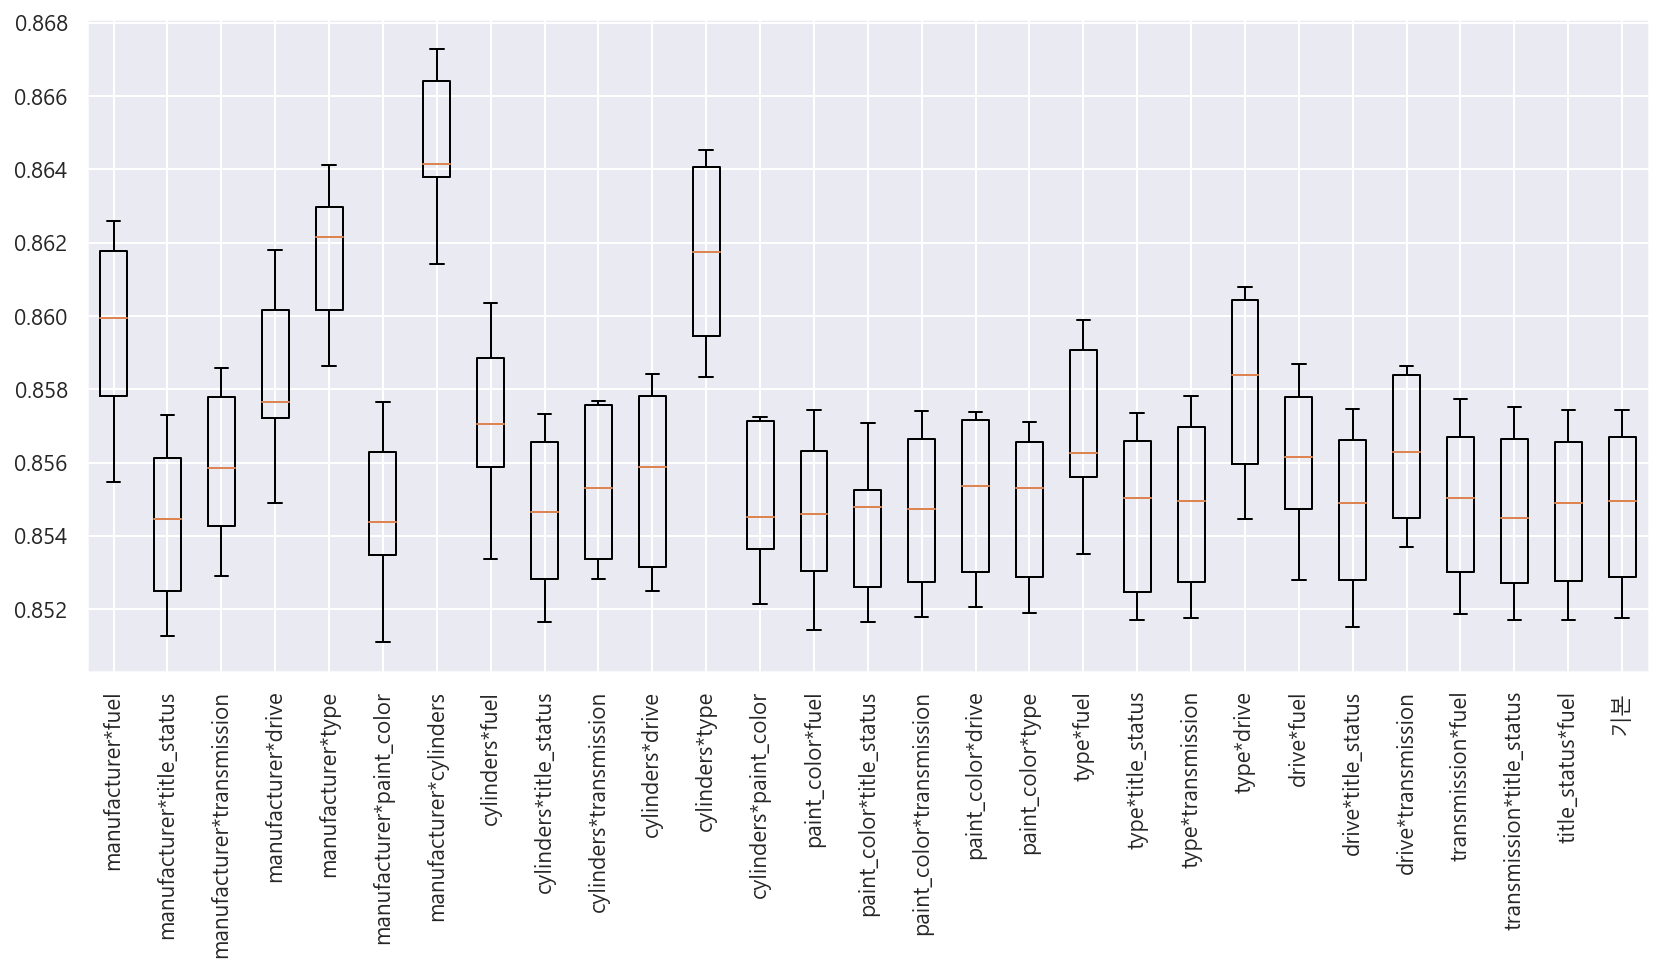

In [76]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax1.boxplot(combination_score)
ax1.set_xticklabels(combination_name, rotation=90)
plt.show()

### price에 0.002씩 증가하면서 제곱하였을때

In [119]:
from used_car_regression import UsedCarRegression
usedcar = UsedCarRegression(test2)

In [88]:
score = []
shift = []
i = 1 - 0.002
for j in range(20):
    i += 0.002
    score.append(usedcar.cross_validation("np.log(price**{}) ~ scale(odometer) + scale(year) +C(manufacturer)+C(cylinders)+C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)+0".format(i)))
    shift.append(i)
    print(i)

1.0
1.002
1.004
1.006
1.008
1.01
1.012
1.014
1.016
1.018
1.02
1.022
1.024
1.026
1.028
1.03
1.032
1.034
1.036
1.038


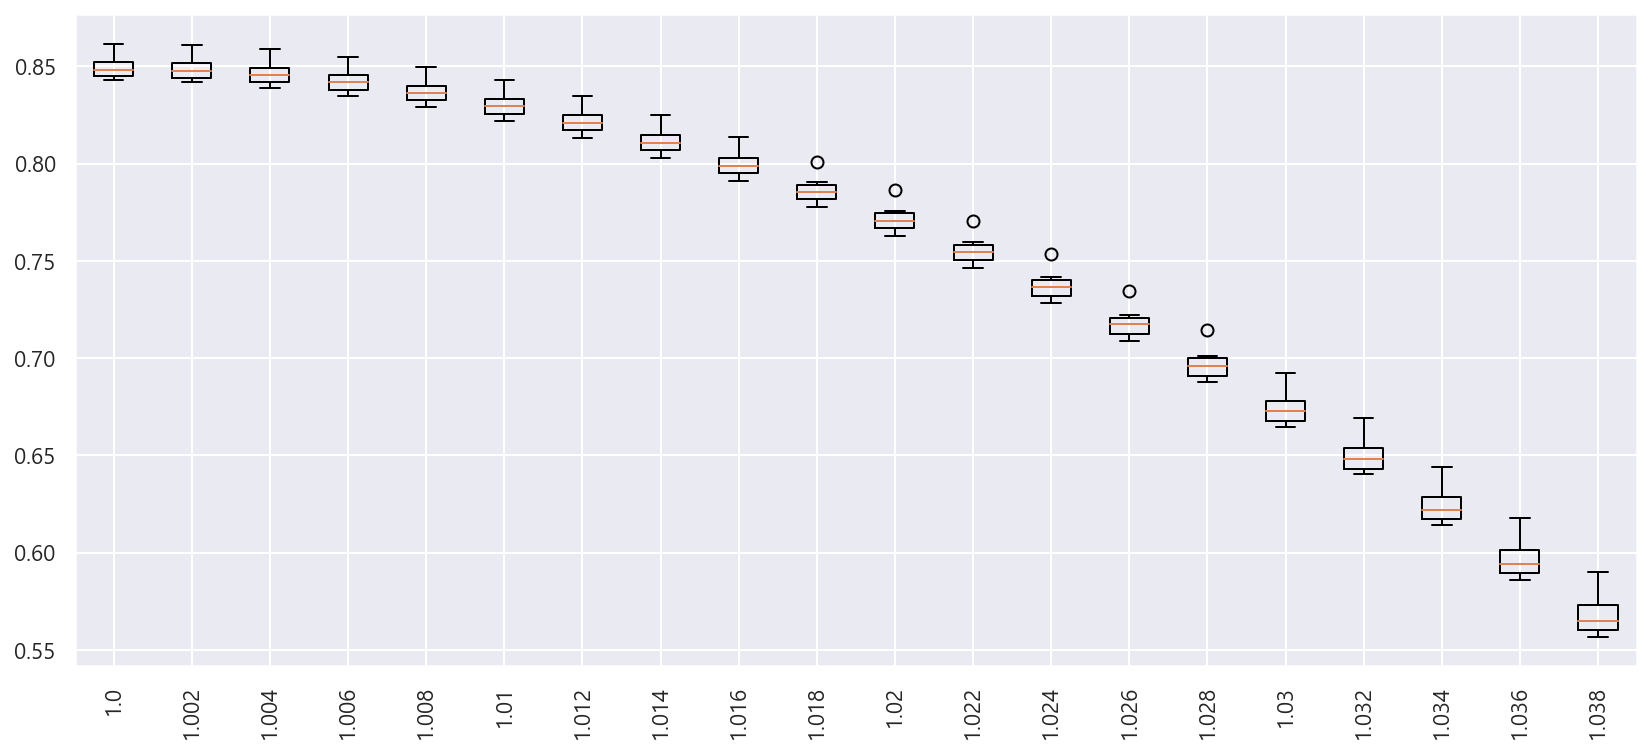

In [89]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax1.boxplot(score)
ax1.set_xticklabels(shift, rotation=90)
plt.show()

### price에 0.002씩 감소하면서 제곱하였을때

In [90]:
score = []
shift = []
i = 1 + 0.002
for j in range(20):
    i -= 0.002
    score.append(usedcar.cross_validation("np.log(price**{}) ~ scale(odometer) + scale(year) +C(manufacturer)+C(cylinders)+C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)+0".format(i)))
    shift.append(i)
    print(i)

1.0
0.998
0.996
0.994
0.992
0.99
0.988
0.986
0.984
0.982
0.98
0.978
0.976
0.974
0.972
0.97
0.968
0.966
0.964
0.962


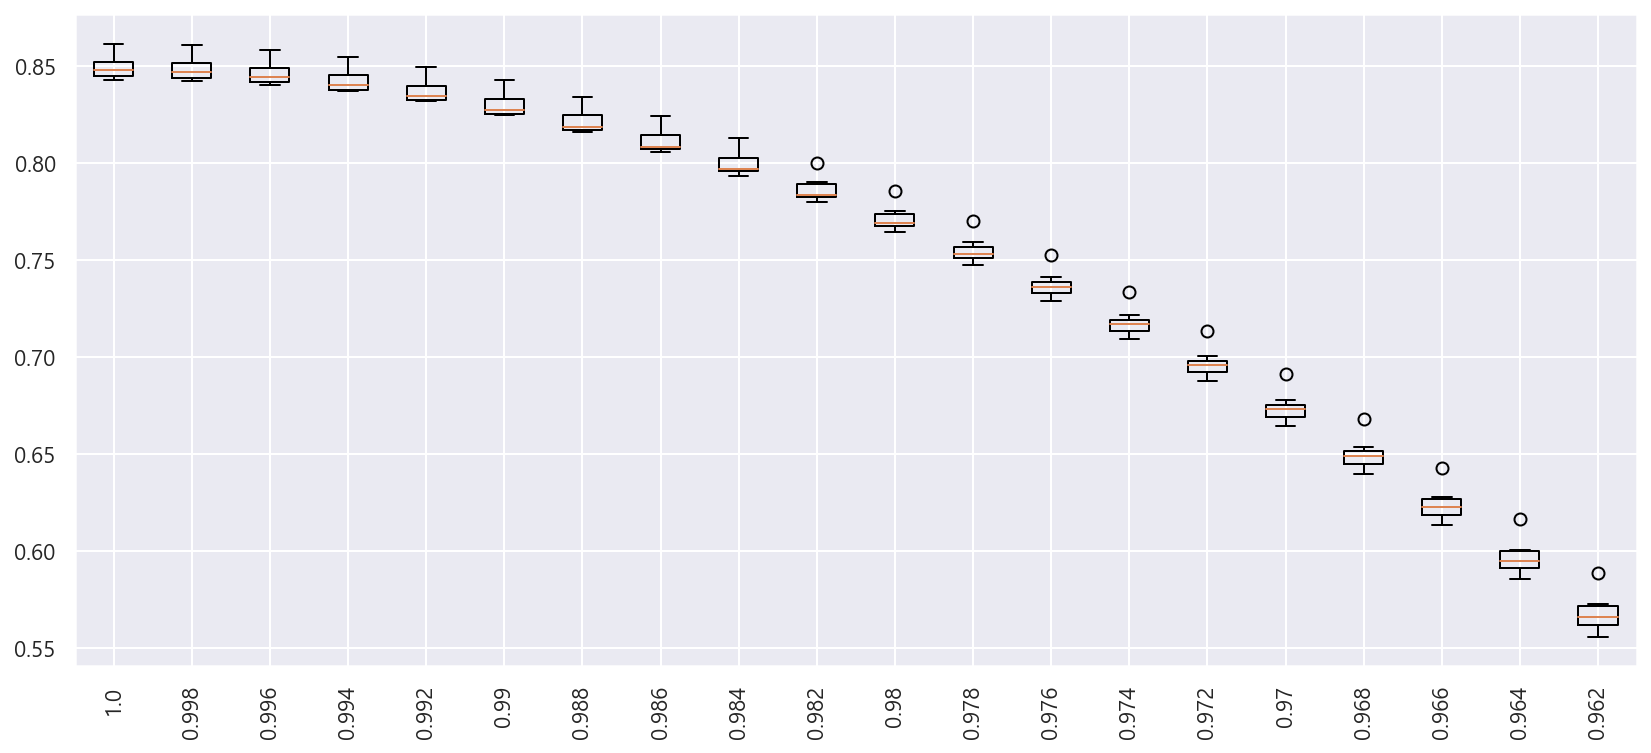

In [91]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax1.boxplot(score)
ax1.set_xticklabels(shift, rotation=90)
plt.show()

### year를 0.2씩 증가시키면서  보았을때


In [102]:
score = []
shift = []
i = 1 - 0.2
for j in range(4):
    i += 0.2
    score.append(usedcar.cross_validation("np.log(price) ~ scale(odometer) + scale(year)+scale(I(year**{})) +C(manufacturer)+C(cylinders)+C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)+0".format(i)))
    shift.append(i)
    print(i)

1.0
1.2
1.4
1.5999999999999999


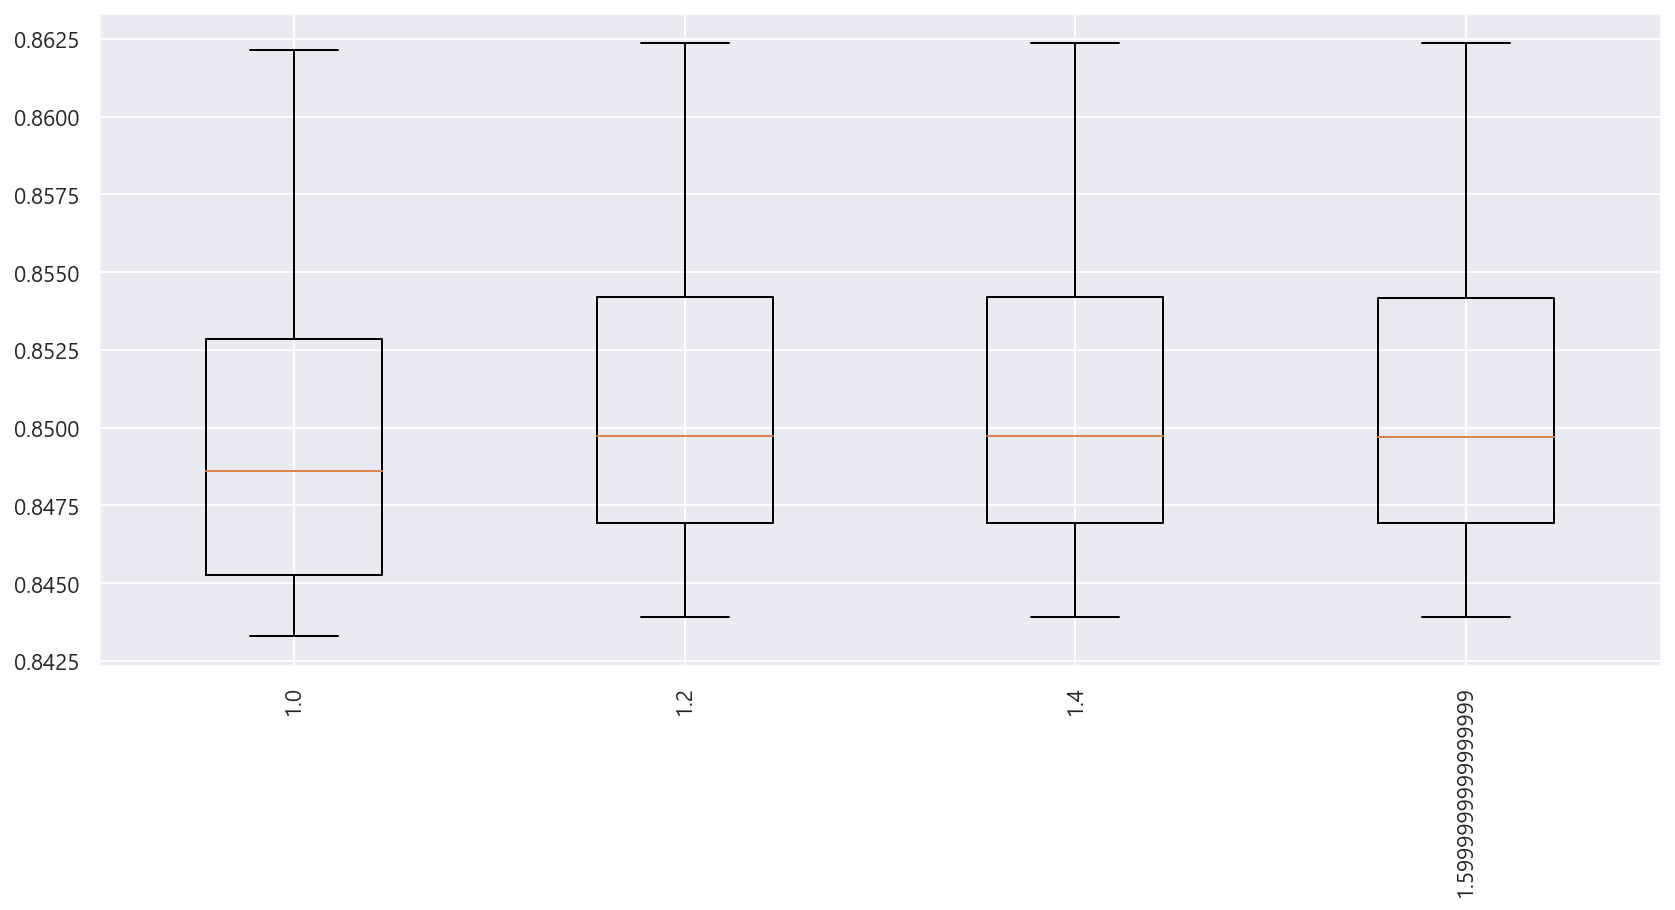

In [103]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax1.boxplot(score)
ax1.set_xticklabels(shift, rotation=90)
plt.show()

### year 2차항 3차항을 넣었을때

In [154]:
score = []


formula = "np.log(price) ~ scale(odometer)+scale(year)+C(manufacturer)+C(cylinders)+C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)"

for i in range(1,7):
    if i == 1:
        score.append(usedcar.cross_validation(formula))
    else:
        formula += "+scale(I(year**{}))".format(i)
        score.append(usedcar.cross_validation(formula))

In [157]:
name = ['1차항', '2차항', '3차항', '4차항', '5차항', '6차항']

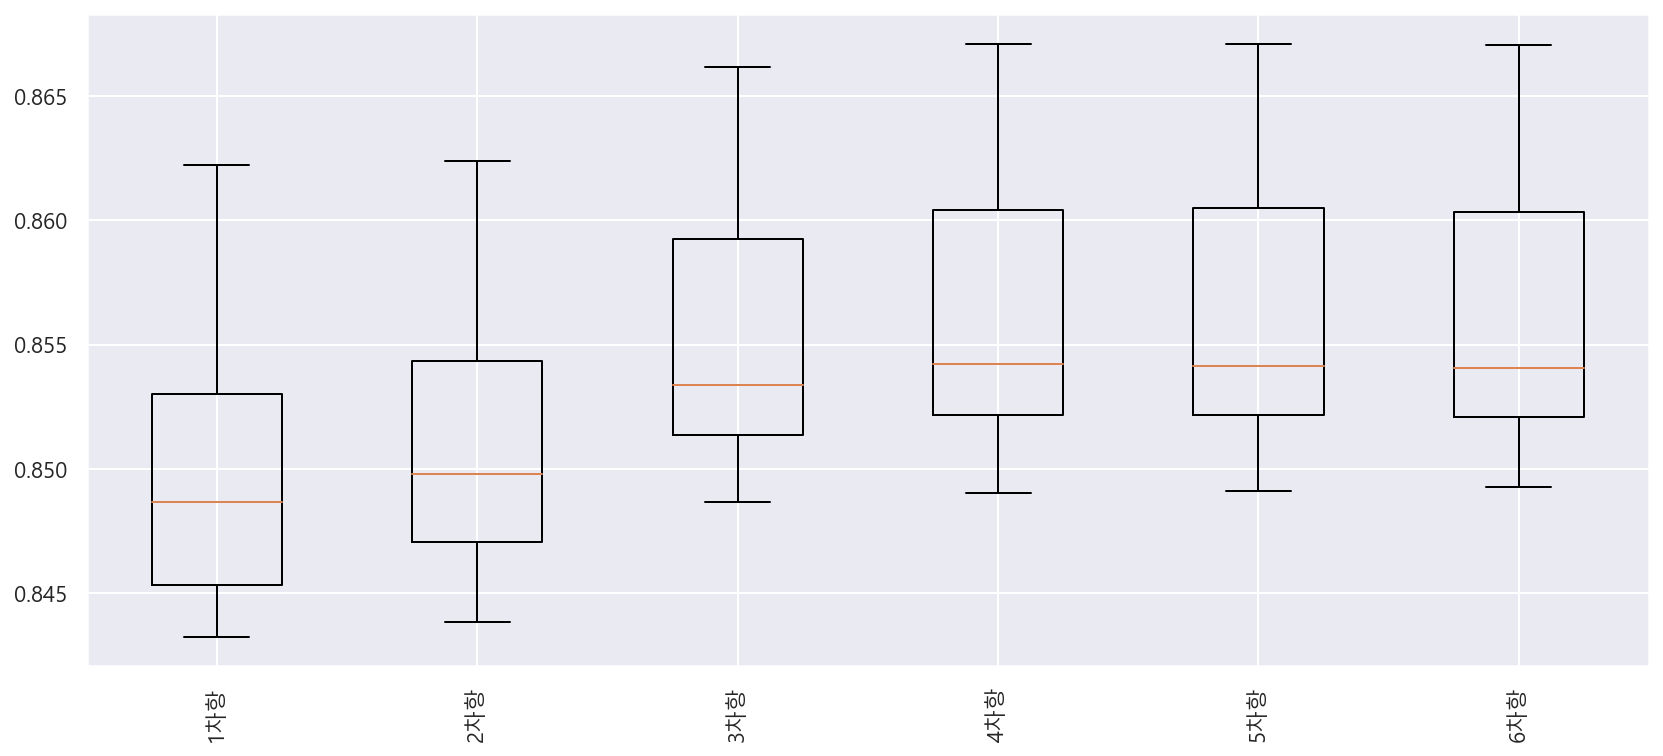

In [158]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax1.boxplot(score)
ax1.set_xticklabels(name, rotation=90)
plt.show()

In [159]:
formula

'np.log(price) ~ scale(odometer)+scale(year)+C(manufacturer)+C(cylinders)+C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)+scale(I(year**2))+scale(I(year**3))+scale(I(year**4))+scale(I(year**5))+scale(I(year**6))'

### odometer(총주행거리)에 제곱항 세제곱항 네제곱항을 넣었을때

In [147]:
score = []


formula = "np.log(price) ~ scale(odometer)+scale(year)+C(manufacturer)+C(cylinders)+C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)"

for i in range(1,5):
    if i == 1:
        score.append(usedcar.cross_validation(formula))
    else:
        formula += "+scale(I(odometer**{}))".format(i)
        score.append(usedcar.cross_validation(formula))
        

In [148]:
name = ['1차항', '2차항', '3차항', '4차항']

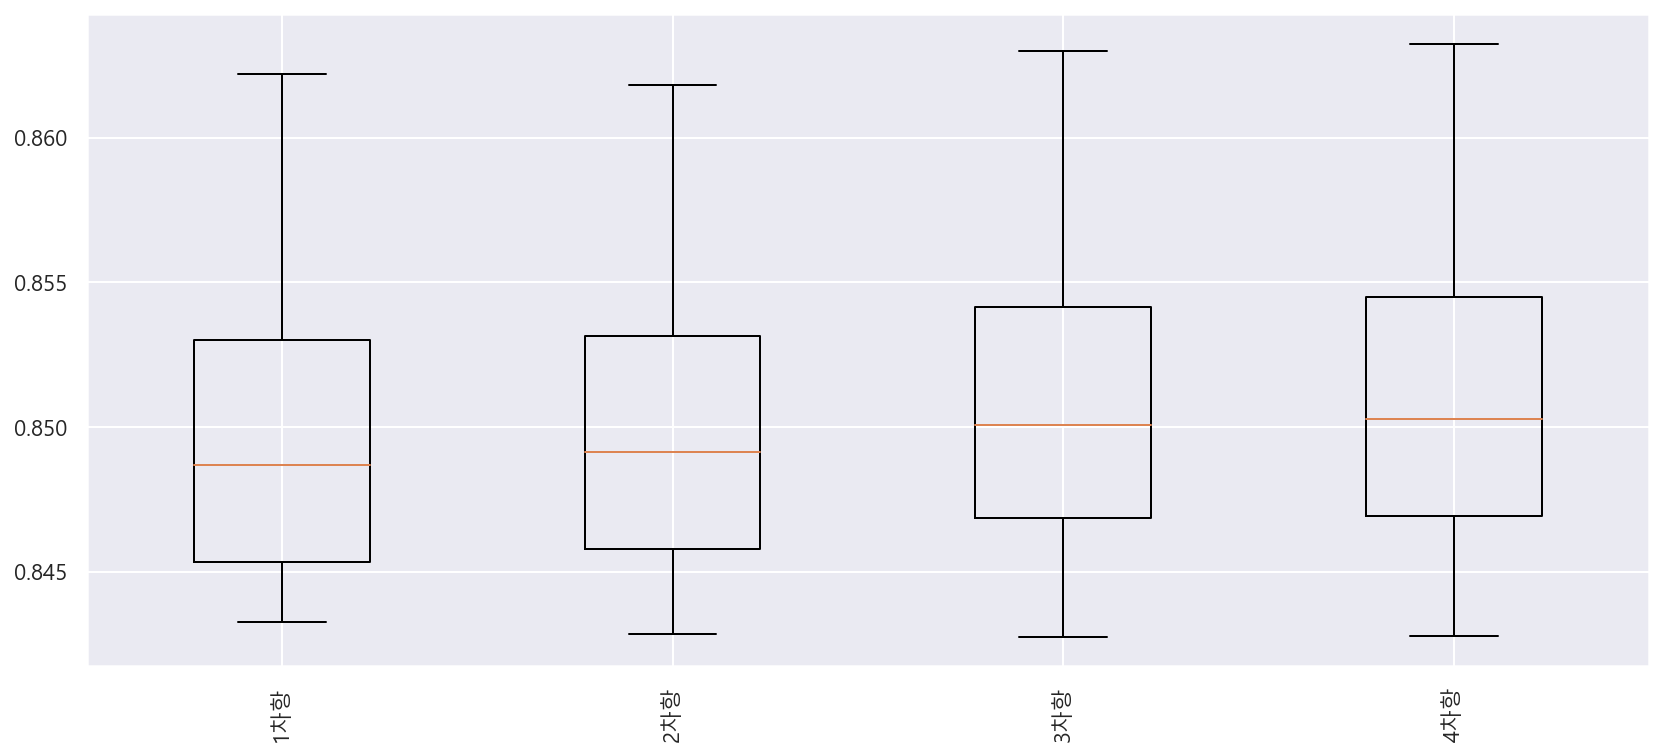

In [149]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax1.boxplot(score)
ax1.set_xticklabels(name, rotation=90)
plt.show()

## model1 기본 회귀식
    - 종속변수에 log값 적용

#### model1 =  np.log(price) ~ scale(odometer) + scale(year) +C(manufacturer)+C(cylinders)+C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)

## model2  실수형*범주형 interaction 추가
    - odometer : cylinders -> 장거리 운행을 하는 특정 실린더가 있을것으로 판단
    - odometer : type ->  장거리 운행을 하는 특정 타입이 있을것으로 판단
    - year : manufacturer -> 연도별 인기 제조사가 있을것으로 판단
    

#### model2 =  np.log(price) ~ scale(odometer) + scale(year) +C(manufacturer)+C(cylinders)+C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)+scale(odometer):C(cylinders)+scale(odometer):C(type)+scale(year):C(manufacturer)

## model3  범주형*범주형 interaction 추가
    - manufactuer : cylinders -> 제조사의 특정 몇기통의차가 가격의 영향을 줄것으로 판단
    - type : drive -> 차종의 구동방식이 영향을 줄것으로 판단
    
    

#### model3 =  np.log(price) ~ scale(odometer) + scale(year) +C(manufacturer)+C(cylinders)+C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)+scale(odometer):C(cylinders)+scale(odometer):C(type)+scale(year):C(manufacturer)+C(manufacturer):C(cylinders)+C(type):C(drive)

## model4  year  다항식추가
    - 4차항 까지 추가

#### model4 =  np.log(price) ~ scale(odometer) + scale(year) +C(manufacturer)+C(cylinders)+C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)+scale(odometer):C(cylinders)+scale(odometer):C(type)+scale(year):C(manufacturer)+C(manufacturer):C(cylinders)+C(type):C(drive)+scale(I(year**2))+scale(I(year**3))+scale(I(year**4))

In [14]:
model1_formula =  "np.log(price) ~ scale(odometer) + scale(year) +C(manufacturer)+C(cylinders)+C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)"

In [15]:
model2_formula =  "np.log(price) ~ scale(odometer) + scale(year) +C(manufacturer)+C(cylinders)+C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)+scale(odometer):C(cylinders)+scale(odometer):C(type)+scale(year):C(manufacturer)"

In [16]:
model3_formula =  "np.log(price) ~ scale(odometer) + scale(year) +C(manufacturer)+C(cylinders)+C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)+scale(odometer):C(cylinders)+scale(odometer):C(type)+scale(year):C(manufacturer)+C(manufacturer):C(cylinders)+C(type):C(drive)"

In [10]:
model4_formula =  "np.log(price) ~ scale(odometer) + scale(year) +C(manufacturer)+C(cylinders)+C(drive)+C(fuel)+C(state)+C(title_status)+C(transmission)+C(type)+C(paint_color)+scale(odometer):C(cylinders)+scale(odometer):C(type)+scale(year):C(manufacturer)+C(manufacturer):C(cylinders)+C(type):C(drive)+scale(I(year**2))+scale(I(year**3))+scale(I(year**4))"

In [18]:
model1 = usedcar.cross_validation(model1_formula)
model2 = usedcar.cross_validation(model2_formula)
model3 = usedcar.cross_validation(model3_formula)
model4 = usedcar.cross_validation(model4_formula)

In [20]:
score = [model1, model2, model3, model4]
name = ['model1', 'model2','model3', 'model4']

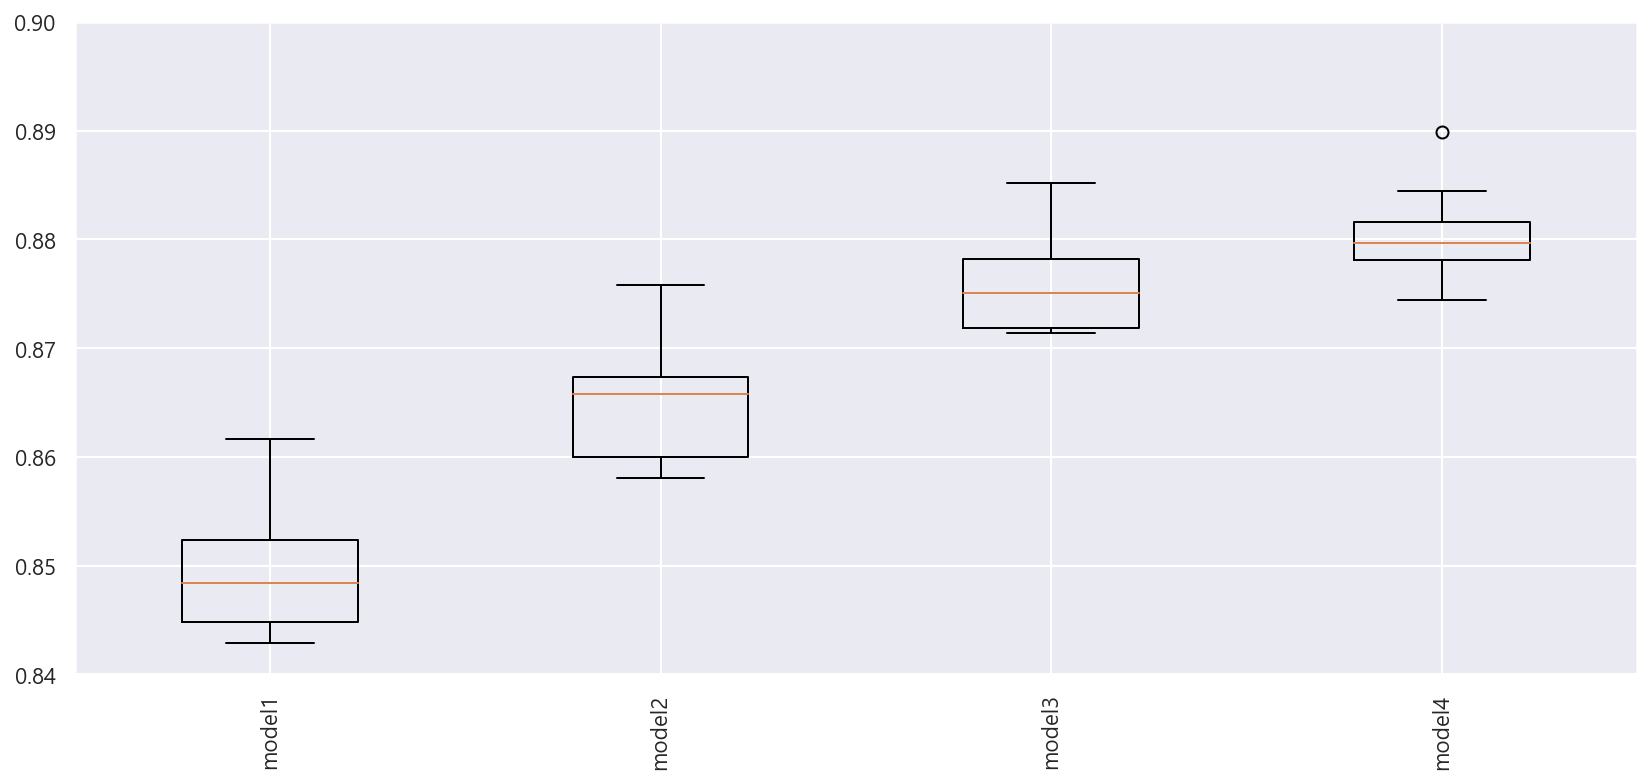

In [28]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax1.boxplot(score)
ax1.set_xticklabels(name, rotation=90)
ax1.set_ylim(0.84, 0.90)
plt.show()

### 정규화 적용

In [7]:
from used_car_regression import UsedCarRegression

In [8]:
usedcar = UsedCarRegression(test2)

In [11]:
resut, train_data, test_data, train_ls, test_ls = usedcar.model_fit(model4_formula)

In [12]:
print(resut.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1087.
Date:                Sat, 11 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:50:52   Log-Likelihood:                 2128.3
No. Observations:               44734   AIC:                            -3621.
Df Residuals:                   44416   BIC:                            -851.3
Df Model:                         317                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [12]:
score = []
name = ['정규화전', 'Lasso적용', "Ridge적용", "elastic적용"]
basic = usedcar.cross_validation(model4_formula)
lasso = usedcar.cross_validation_lasso(model4_formula)
ridge = usedcar.cross_validation_ridge(model4_formula)
elastic = usedcar.cross_validation_elastic(model4_formula)


In [13]:
score = [basic, lasso, ridge, elastic]

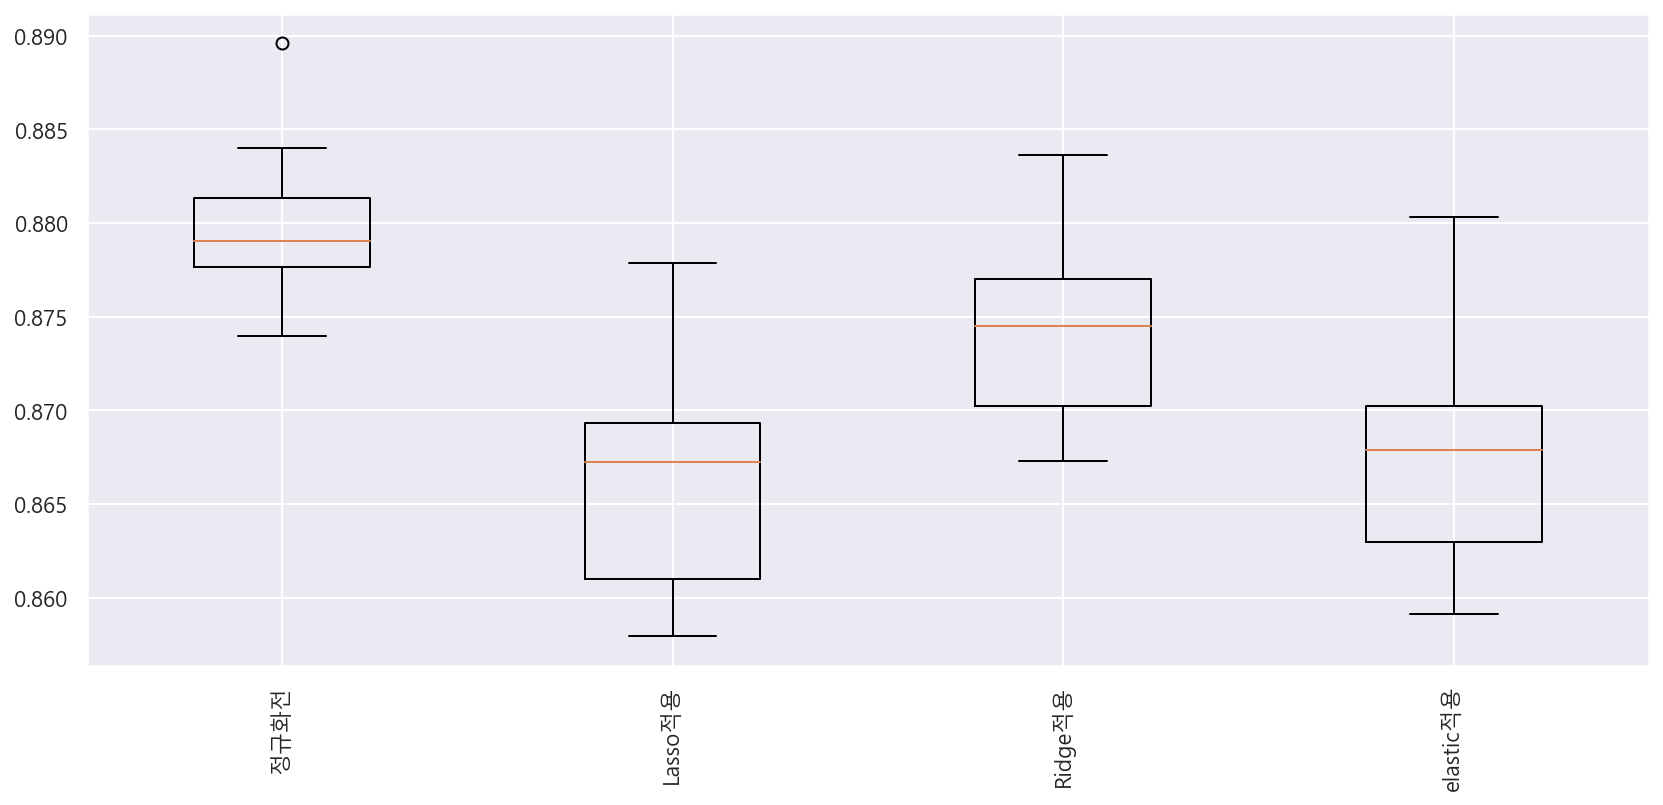

In [14]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax1.boxplot(score)
ax1.set_xticklabels(name, rotation=90)
plt.show()